In [2]:
from matplotlib import pyplot as plt
# from brokenaxes import brokenaxes
import numpy as np
import os
import sys
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

my_figsize = [15, 10]
my_fontsize = 35
WIDTH = 0.05  # the width of the bars
SHORT = 10000 # 10KB
LONG = 100000 # 100KB
LOADS = ['0.1', '0.25', '0.5', '0.75', '1']
labels = ['10', '25', '50', '75', '100'] # LOADS

# LOADS = [2, 4, 6, 8, 10, 12, 14, 16]
# labels = [2, 4, 6, 8, 10, 12, 14, 16]
# LOADS = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]
# labels = [2, 4, 6, 8, 10, 15, 20, 30, 40, 50]

# LOADS = ['0.25']
# labels = ['2', '3', '4', '5', '6']
# WORKLOADS = ['W1', 'W2', 'W3', 'W4']
WORKLOADS = ['W4']
# WORKLOADS = ['incast']
# WORKLOADS = ['uniformincast']

GOSSIP = [300]

SCHEDULED = [30]

# PIAS = ['PIAS', 'NO-PIAS']
PIAS = ['PIAS']


METRICS = ['FCT', 'GOODPUT']


os.chdir(sys.path[0])
os.chdir('./')

# SCHEMES = ['NegotiaToR', 'PIM']
# SCHEMES = ['NegotiaToR-8uplinks', 'benes-vlb1', 'benes-vlb1.5', 'benes-vlb2']
# SCHEMES = ['1', 'single_dst_grant']
# SCHEMES = ['100G', '200G', '300G', 'benes-vlb1']
# SCHEMES = ['1', '2', '3', '4', '5']
# SCHEMES = ['1', '2p', '3p', '4p', '5p']
# SCHEMES = ['benes/1_new', 'benes-vlb/1', 'benes/2_new', 'benes-vlb/2']
# SCHEMES = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4', 'ITER_5', 'ITER_6', 'ITER_7']
# SCHEMES = ['50', '100', '150', '200', '250']
# SCHEMES = ['ITER_1', 'ITER_3', 'ITER_5', 'ITER_7']
# SCHEMES = ['NegotiaToR-iterative/tmp/1', 'NegotiaToR-iterative/tmp/2', 'NegotiaToR-iterative/tmp/3', 'NegotiaToR-iterative/tmp/4','NegotiaToR-iterative/tmp/5']
# SCHEMES = ['NegotiaToR/tmp/1', 'NegotiaToR/tmp/2', 'NegotiaToR/tmp/3', 'NegotiaToR/tmp/4','NegotiaToR/tmp/5']
# Pias = ['PIAS', 'No-PIAS']
Pias = ['PIAS']
# Topo = ['Benes', 'Big-Switch']
Topo = ['Benes']
Algo = ['NegotiaToR', 'VLB']
# Algo = ['VLB']
# Iter = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4', 'ITER_5', 'ITER_6', 'ITER_7']
Iter = ['ITER_1']
Acc =  ['ACC_1', 'ACC_2', 'ACC_3', 'ACC_4', 'ACC_5']
# Acc =  ['ACC_5']
SCHEMES = ['NegotiaToR/ITER_1/ACC_1', 'NegotiaToR/ITER_1/ACC_2','NegotiaToR/ITER_1/ACC_3', 'NegotiaToR/ITER_1/ACC_4','NegotiaToR/ITER_1/ACC_5', 'VLB/ITER_1/ACC_1', 'VLB/ITER_1/ACC_2', 'VLB/ITER_1/ACC_3', 'VLB/ITER_1/ACC_4', 'VLB/ITER_1/ACC_5']
# DATA_DIR_TEMP = '../DATA/NegotiaToR/{pias}/{scheme}/ACC_3/DATA_vote_{workload}_{load}_scheduled_{scheduled}/'
# DATA_DIR_TEMP = '../DATA/PIAS/Big-Switch/{scheme}/ITER_1/ACC_2/DATA_vote_W4_{load}/'
DATA_DIR_TEMP = '../DATA/PIAS/Big-Switch/{scheme}/DATA_vote_W4_{load}/'


FIG_FILE_NAME = WORKLOADS[0]
FIGURE_DIR = '../FIGS/'+ FIG_FILE_NAME +'/GOODPUT/'
if not os.path.exists(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)

data = {}
for scheme in SCHEMES:
    data[scheme] = {}
    for pias in PIAS:
        data[scheme][pias] = {}
        for workload in WORKLOADS:
            data[scheme][pias][workload] = {}
            for load in LOADS:
                data[scheme][pias][workload][load] = {}
                for gossip in GOSSIP:
                    data[scheme][pias][workload][load][gossip] = {}
                    for scheduled in SCHEDULED:
                        data[scheme][pias][workload][load][gossip][scheduled] = {}
                    
                
for scheme in SCHEMES:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for gossip in GOSSIP:
                    for scheduled in SCHEDULED:
                        dir_path = DATA_DIR_TEMP.format(pias=pias, scheme=scheme, workload=workload, load=load, gossip=gossip, scheduled=scheduled)
                        data[scheme][pias][workload][load]['PATH'] = dir_path
                        for metric in METRICS:
                            data_path = dir_path + metric + '.txt'
                            data[scheme][pias][workload][load][gossip][scheduled][metric] = np.loadtxt(data_path)
                            print("LOADED: ", scheme, pias, workload, load, gossip, scheduled, metric)

for scheme in SCHEMES:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for gossip in GOSSIP:
                    for scheduled in SCHEDULED:
                        data[scheme][pias][workload][load][gossip][scheduled]['SHORT_IDX'] = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] < SHORT
                        data[scheme][pias][workload][load][gossip][scheduled]['LONG_IDX'] = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] > LONG
                        data[scheme][pias][workload][load][gossip][scheduled]['MIDDLE_IDX'] = (data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] >= SHORT) * (data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] <= LONG)

# WIDTH = 0.05  # the width of the bars




LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.1 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.1 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.25 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.25 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.5 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.5 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.75 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 0.75 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 1 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_1 PIAS W4 1 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.1 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.1 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.25 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.25 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.5 300 30 FCT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.5 300 30 GOODPUT
LOADED:  NegotiaToR/ITER_1/ACC_2 PIAS W4 0.75 300 30 FCT
LOADED:  Nego

In [3]:
my_figsize = [20, 8]
WIDTH = 0.03  # the width of the bars
hatches = ["", "...", "xx", "\\", "/", "x", "o"]
colors = ["white", "white", "white", "white", "white", "white", "white"]
SCHEMES_label = ['NegotiaToR (1x)', 'NegotiaToR (2x)', 'NegotiaToR (3x)' , 'NegotiaToR (4x)', 'NegotiaToR (5x)', 'Traffic Oblivious (1x)', 'Traffic Oblivious (2x)', 'Traffic Oblivious (3x)', 'Traffic Oblivious (4x)', 'Traffic Oblivious (5x)']


[-0.18  0.12  0.42  0.72  1.02]


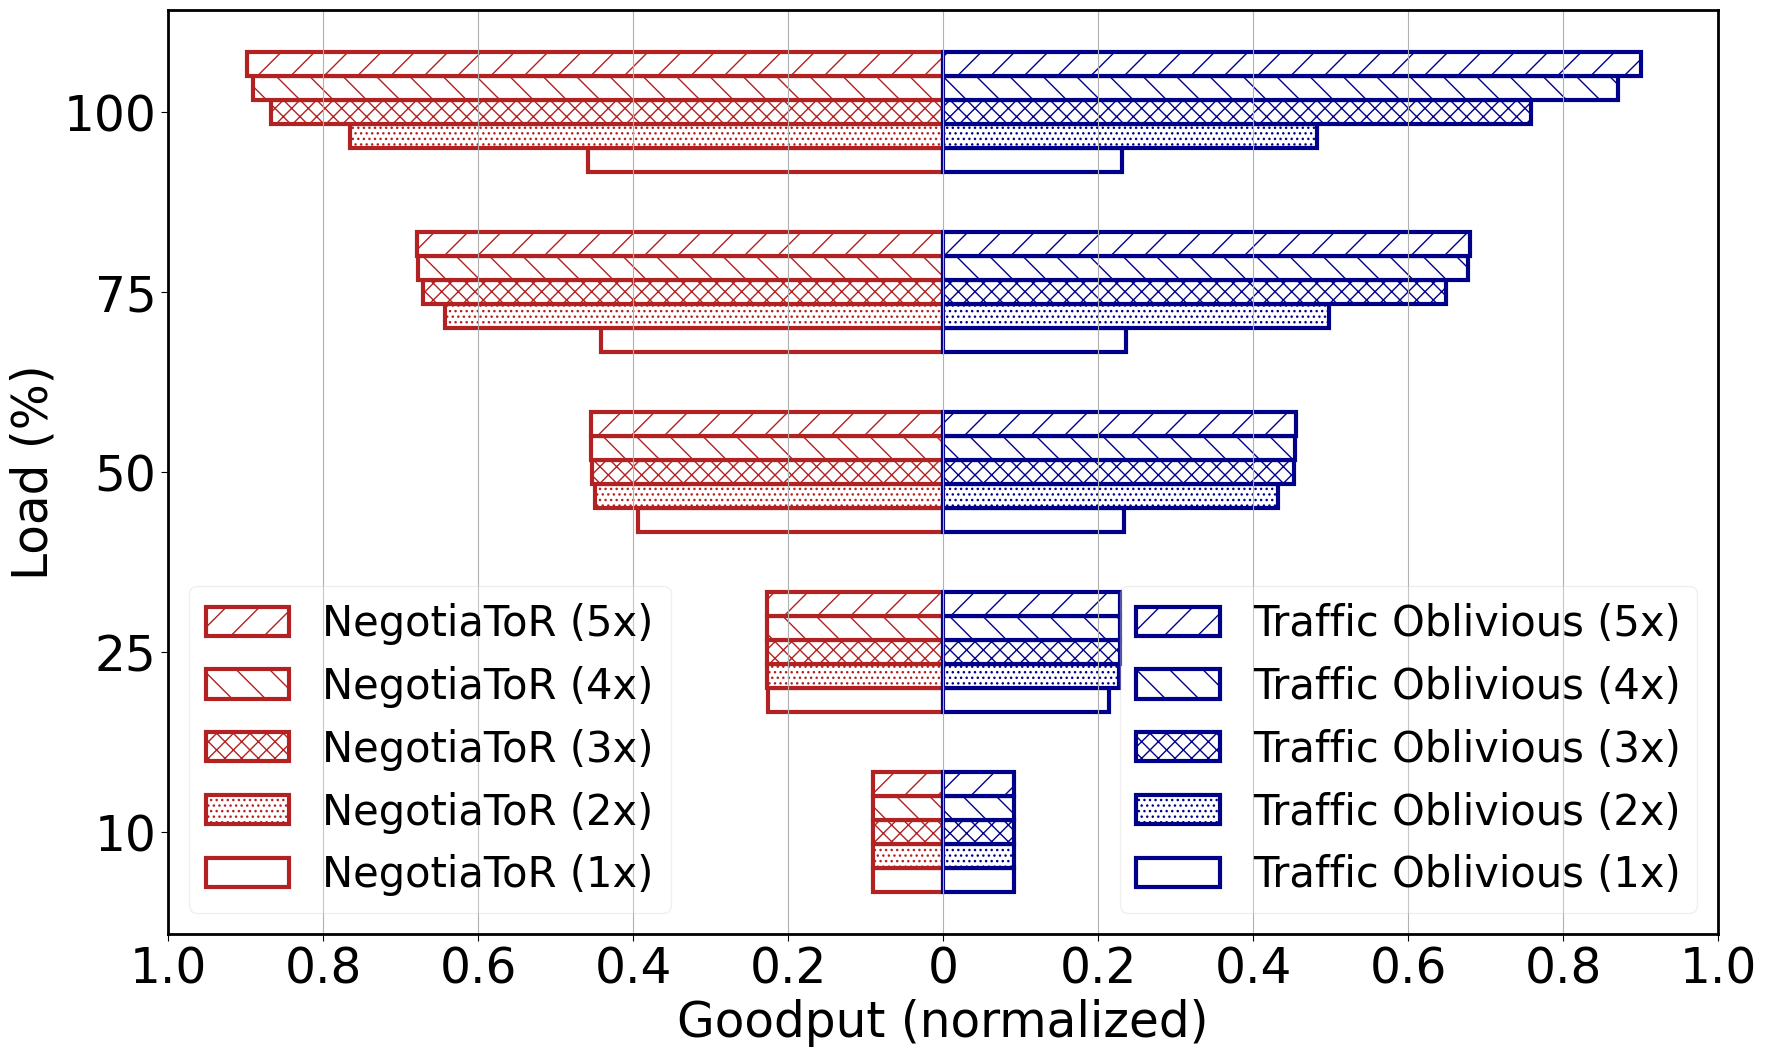

In [5]:
WIDTH = 0.04
my_figsize = (20, 12)
def goodput_bar_plot(labels):
    results = {}
    i = 0
    for ii, scheme in enumerate(SCHEMES):
        results[scheme] = []
        i = i + 100
        for load in LOADS:
            idx = data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][:, 2] > 0
            goodput = data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][idx, 1] # goodput
            if ii < 5:
                results[scheme].append(-np.mean(goodput)/400)
            else:
                results[scheme].append(np.mean(goodput)/400)


    x_tick = np.arange(len(labels))*0.3 # the label locations
    x = x_tick - (len(SCHEMES)-1)*WIDTH/2
    print(x)

    # hatches = ["xxxx", "", "\\\\", "", "////"]
    # colors = ["white", "black", "white", "white", "white"]

    # schemes = ['Ideal', 'Zeropod', 'Fastpass', 'DCTCP']

    # hatches = ["", ".", "\\", "/", "x", "*", "o"]
    # colors = ["white", "white", "white", "white", "white", "white", "white"]

    # SCHEMES_label = SCHEMES
    # SCHEMES_label = ['NegotiaToR', 'Benes-VLB']
    # SCHEMES_label = ['NegotiaToR(1x)', 'Benes-VLB(1x)', 'Benes-VLB(1.5x)', 'Benes-VLB(2x)']
    # SCHEMES_label = ['multi_dst_grant', 'single_dst_grant']
    # SCHEMES_label = ['100G', '200G', '300G', '400G']
    # SCHEMES_label = ['NegotiaToR(1x)', 'NegotiaToR(2x)', 'NegotiaToR(3x)', 'NegotiaToR(4x)', 'NegotiaToR(5x)']
    # SCHEMES_label = ['Sirius(1x)', 'Sirius(2x)', 'Sirius(3x)', 'Sirius(4x)', 'Sirius(5x)']
    # SCHEMES_label = ['VLB(1x)', 'VLB(2x)', 'VLB(3x)', 'VLB(4x)', 'VLB(5x)']
    # SCHEMES_label = ['Traffic Oblivious (1x)', 'NegotiaToR (1x)', 'Traffic Oblivious (2x)', 'NegotiaToR (2x)', 'Traffic Oblivious (3x)', 'NegotiaToR (3x)']
    # SCHEMES_label = ['NegotiaToR(old)', 'NegotiaToR(new)', 'NegotiaToR(2x)', 'VLB(2x)']
    # SCHEMES_label = ['1-iterative', '3-iterative', '5-iterative', '7-iterative']
    # SCHEMES_label = ['ITER_1', 'ITER_2', 'ITER_3', 'ITER_4', 'ITER_5', 'ITER_6', 'ITER_7']




    fig, ax = plt.subplots(figsize=my_figsize)
    ax.spines['bottom'].set_linewidth('2.0')
    ax.spines['top'].set_linewidth('2.0')
    ax.spines['left'].set_linewidth('2.0')
    ax.spines['right'].set_linewidth('2.0')
    ax.tick_params(axis='both', which='both', length=5)
    p1 = []
    p2 = []
    for i, scheme in enumerate(SCHEMES):
        if i < 5:
            p1.append(ax.barh(x + WIDTH*i, results[scheme], WIDTH, edgecolor="firebrick", color=[colors[i]], label=SCHEMES_label[i], hatch=hatches[i], linewidth = 3))
        else:
            p2.append(ax.barh(x + WIDTH*(i-5), results[scheme], WIDTH, edgecolor="darkblue", color=[colors[i-5]], label=SCHEMES_label[i], hatch=hatches[i-5], linewidth = 3))

    # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
    ax.set_xlabel('Goodput (normalized)', fontsize=my_fontsize)
    # ax.set_ylabel('Goodput (Gbps)', fontsize=my_fontsize)
    ax.set_xticks(x_tick)
    # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
    ax.set_ylabel("Load (%)", fontsize=my_fontsize)
    # ax.set_yticklabels(labels, fontsize=my_fontsize)
    # ax.legend(ncol=2, lxoc = "upper left", fontsize=my_fontsize-2, handlelength = 1.5, borderpad = 0.2,  labelspacing = 0.3, columnspacing = 1.0)


    # plt.ylim((0, 250))
    plt.xticks(np.arange(-1,1.001,0.2), [1.0, 0.8, 0.6, 0.4, 0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=my_fontsize)
    plt.yticks(x+WIDTH*2, labels, fontsize=my_fontsize)
    plt.xlim([-1,1])
    # plt.yticks()
    ax.grid(axis="x")
    # plt.yticks(fontsize=my_fontsize)
    # ax.set_title("Thin-Clos Network", fontsize=my_fontsize)
    a = plt.legend(p1[::-1], ['NegotiaToR (5x)', 'NegotiaToR (4x)', 'NegotiaToR (3x)' , 'NegotiaToR (2x)', 'NegotiaToR (1x)'], loc='lower left', fontsize=my_fontsize-5, framealpha=0.3)
    plt.legend(p2[::-1], ['Traffic Oblivious (5x)', 'Traffic Oblivious (4x)', 'Traffic Oblivious (3x)', 'Traffic Oblivious (2x)', 'Traffic Oblivious (1x)'], loc='lower right', fontsize=my_fontsize-5, framealpha=0.3)
    
    plt.gca().add_artist(a)

    figure_path = '../FIGS/NegotiaToR Figs/1/goodput.pdf'
    plt.savefig(figure_path, dpi=300, bbox_inches='tight')

goodput_bar_plot(labels)

In [27]:
# load data: Round-Robin

os.chdir(sys.path[0])
os.chdir('../')

DATA_DIR_TEMP3 = './{pias}/{scheme}/DATA_vote_{workload}_{load}_vlb_{vlb_threshold}/'
SCHEMES3 = ['Round-Robin']
THRESOLDS = [25]

for scheme in SCHEMES3:
    data[scheme] = {}
    for pias in PIAS:
        data[scheme][pias] = {}
        for workload in WORKLOADS:
            data[scheme][pias][workload] = {}
            for load in LOADS:
                data[scheme][pias][workload][load] = {}
                for vlb_threshold in THRESOLDS:
                    data[scheme][pias][workload][load][vlb_threshold] = {}
                

for scheme in SCHEMES3:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for vlb_threshold in THRESOLDS:
                    dir_path = DATA_DIR_TEMP3.format(pias=pias, scheme=scheme, workload=workload, load=load, vlb_threshold=vlb_threshold)
                    data[scheme][pias][workload][load]['PATH'] = dir_path
                    for metric in METRICS:
                        data_path = dir_path + metric + '.txt'
                        data[scheme][pias][workload][load][vlb_threshold][metric] = np.loadtxt(data_path)
                        print("LOADED: ", scheme, pias, workload, load, vlb_threshold, metric)

FileNotFoundError: ./PIAS/Round-Robin/DATA_vote_W4_0.1_vlb_25/FCT.txt not found.

In [12]:
# load data other of VOTE
SCHEMES2 = ['Vote']
GOSSIPS = [300]
SCHEDULES = [20]

DATA_DIR_TEMP2 = './{pias}/{scheme}/DATA/DATA_vote_{workload}_{load}_gossip_{gossip}_scheduled_{scheduled}/'

for scheme in SCHEMES2:
    data[scheme] = {}
    for pias in PIAS:
        data[scheme][pias] = {}
        for workload in WORKLOADS:
            data[scheme][pias][workload] = {}
            for load in LOADS:
                data[scheme][pias][workload][load] = {}
                for scheduled in SCHEDULES:
                    data[scheme][pias][workload][load][scheduled] = {}
                    for gossip in GOSSIPS:
                        data[scheme][pias][workload][load][gossip][scheduled] = {}

for scheme in SCHEMES2:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for scheduled in SCHEDULES:
                    for gossip in GOSSIPS:
                        dir_path = DATA_DIR_TEMP2.format(pias=pias, scheme=scheme, workload=workload, load=load, scheduled=scheduled, gossip=gossip)
                        data[scheme][pias][workload][load][gossip][scheduled]['PATH'] = dir_path
                        for metric in METRICS:
                            data_path = dir_path + metric + '.txt'
                            data[scheme][pias][workload][load][gossip][scheduled][metric] = np.loadtxt(data_path)
                            print("LOADED: ", scheme, pias, workload, load, metric, scheduled, gossip)

OSError: ./NO-PIAS/Vote/DATA/DATA_vote_W5_0.1_gossip_300_scheduled_20/FCT.txt not found.

In [12]:

# for scheme in SCHEMES1:
#     for pias in PIAS:
#         for workload in WORKLOADS:
#             for load in LOADS:
#                 data[scheme][pias][workload][load]['SHORT_IDX'] = data[scheme][pias][workload][load]['FCT'][:, 4] < SHORT
#                 data[scheme][pias][workload][load]['LONG_IDX'] = data[scheme][pias][workload][load]['FCT'][:, 4] > LONG
#                 data[scheme][pias][workload][load]['MIDDLE_IDX'] = (data[scheme][pias][workload][load]['FCT'][:, 4] >= SHORT) * (data[scheme][pias][workload][load]['FCT'][:, 4] <= LONG)

for scheme in SCHEMES1:
    for pias in PIAS:
        for workload in WORKLOADS:
            for load in LOADS:
                for gossip in GOSSIP:
                    for scheduled in SCHEDULED:
                        data[scheme][pias][workload][load][gossip][scheduled]['SHORT_IDX'] = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] < SHORT
                        data[scheme][pias][workload][load][gossip][scheduled]['LONG_IDX'] = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] > LONG
                        data[scheme][pias][workload][load][gossip][scheduled]['MIDDLE_IDX'] = (data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] >= SHORT) * (data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 4] <= LONG)

# for scheme in SCHEMES3:
#     for pias in PIAS:
#         for workload in WORKLOADS:
#             for load in LOADS:
#                 for vlb_threshold in THRESOLDS:
#                     data[scheme][pias][workload][load][vlb_threshold]['SHORT_IDX'] = data[scheme][pias][workload][load][vlb_threshold]['FCT'][:, 4] < SHORT
#                     data[scheme][pias][workload][load][vlb_threshold]['LONG_IDX'] = data[scheme][pias][workload][load][vlb_threshold]['FCT'][:, 4] > LONG
#                     data[scheme][pias][workload][load][vlb_threshold]['MIDDLE_IDX'] = (data[scheme][pias][workload][load][vlb_threshold]['FCT'][:, 4] >= SHORT) * (data[scheme][pias][workload][load][vlb_threshold]['FCT'][:, 4] <= LONG)

In [4]:
# 使用参数 Gossip 150, Scheduled 10进行横向比较
# 吞吐
PIAS = ['NO-PIAS']
gossip = 300
scheduled = 20
threshold = 25

my_figsize = [8, 10]
my_fontsize = 40
WIDTH = 0.05  # the width of the bars

# SCHEMES = ['Vote', 'Centralized-Control', 'Round-Robin', 'Round-Robin-No-VLB']
SCHEMES = ['NegotiaToR', 'benes']


def goodput_bar_plot(labels, workload):
    results = {}
    for scheme in SCHEMES1:
        results[scheme] = {}
        for pias in PIAS:
            results[scheme][pias] = []
            for load in LOADS:
                idx =data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][:, 2] > 0               
                goodput = data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][idx, 1]
                print(scheme, pias, np.mean(goodput))
                results[scheme][pias].append(np.mean(goodput))

    # for scheme in SCHEMES2:
    #     results[scheme] = {}
    #     for pias in PIAS:
    #         results[scheme][pias] = []
    #         for load in LOADS:
    #             idx =data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][:, 2] > 0
    #             goodput = data[scheme][pias][workload][load][gossip][scheduled]['GOODPUT'][idx, 1]
    #             results[scheme][pias].append(np.mean(goodput))

    # for scheme in SCHEMES3:
    #     results[scheme] = {}
    #     for pias in PIAS:
    #         results[scheme][pias] = []
    #         for load in LOADS:
    #             idx =data[scheme][pias][workload][load][threshold]['GOODPUT'][:, 2] > 0
    #             goodput = data[scheme][pias][workload][load][threshold]['GOODPUT'][idx, 1]
    #             print(scheme, pias, np.mean(goodput))
    #             results[scheme][pias].append(np.mean(goodput))
    
    new_results = {}
    for scheme in SCHEMES:
        new_results[scheme] = {}
        for pias in PIAS:
            new_results[scheme][pias] = []
            for i in range(5):
                new_results[scheme][pias].append(results[scheme][pias][i] / results["Centralized-Control"][pias][i])


    print(results)


    for pias in PIAS:
        x_tick = np.arange(len(labels))*0.3 # the label locations
        x = x_tick - (len(SCHEMES)-1)*WIDTH/2

        SCHEMES_label = ['NegotiaToR', 'Centralized-Control', 'Round-Robin w/ VLB', 'Round-Robin w/o VLB']

        fig, ax = plt.subplots(figsize=my_figsize)
        ax.grid(axis='y')
        hatches = ["", ".", "\\", "/"]
        colors = ["white", "white", "white", "white"]
        for i, scheme in enumerate(SCHEMES):
            # ax.bar(x + WIDTH*i, results[scheme][mode], WIDTH, label=scheme)
            # 一次画一个scheme的所有load的bar
            ax.bar(x + WIDTH*i, new_results[scheme][pias], WIDTH, edgecolor="black", label=SCHEMES_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])

        ax.set_ylabel('Throughput (Normalized)', fontsize=my_fontsize)
        ax.set_xlabel("Load (%)", fontsize=my_fontsize)
        ax.set_xticks(x_tick)

        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)

        ax.set_xticklabels(labels, fontsize=my_fontsize)
        ax.set_ylim([0,1.7])
        ax.legend(ncol=1, loc = "upper left", fontsize=30)
        # ax.legend(ncol=2, loc = "upper left", fontsize=my_fontsize-2, handlelength=1.5, borderpad = 0.2, labelspacing = 0.3, columnspacing = 1.0)

        figure_path = '../FIGS/comparison_throughput.pdf'
        plt.savefig(figure_path, dpi=300, bbox_inches='tight')


goodput_bar_plot(labels, "W4")

KeyError: 'GOODPUT'

{'NegotiaToR': {'NO-PIAS': [0.021448872470386574, 0.022692810130830077, 0.024937006405872684, 0.027425755246405194, 0.030255851371745492]}, 'benes': {'NO-PIAS': [0.18274841919289123, 0.19293489490661397, 0.21161478334796044, 0.23152685796805533, 0.2545479946517695]}}


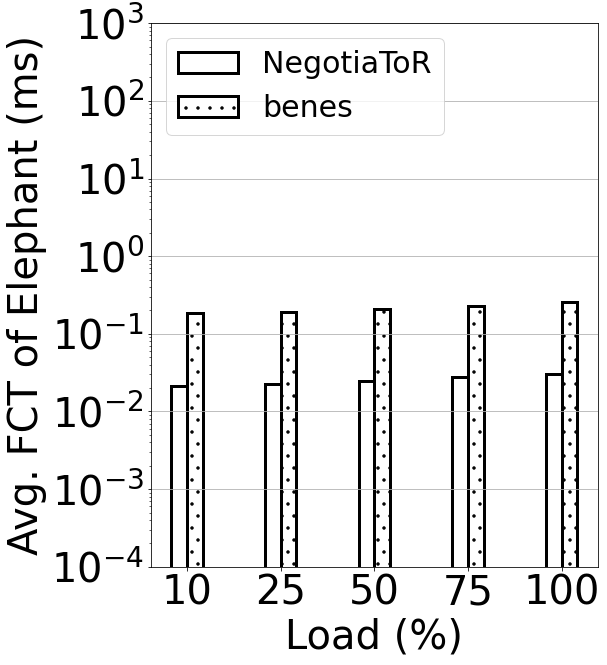

In [19]:
# FCT Slowdown横向比较
# PIAS = ['PIAS', 'NO-PIAS']
# PIAS = ['PIAS']

# SCHEMES = ['Vote', 'Centralized-Control', 'Round-Robin', 'Round-Robin-No-VLB']
# SCHEMES = ['PIM', 'NegotiaToR']
SCHEMES = ['NegotiaToR', 'benes']


PIAS = ['NO-PIAS']
gossip = 300
scheduled = 20
threshold = 25

my_figsize = [8, 10]
my_fontsize = 40
WIDTH = 0.05  # the width of the bars


def slowdown_bar_plot(mode, labels, workload, flow_range='all'):

    results = {}
    for scheme in SCHEMES1:
        results[scheme] = {}
        for pias in PIAS:
            results[scheme][pias] = []
            for load in LOADS:

                if flow_range == 'Mice':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['SHORT_IDX']
                elif flow_range == 'Elephant':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['LONG_IDX']
                elif flow_range == 'middle':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['MIDDLE_IDX']
                elif flow_range == 'all':
                    idx = np.arange(len(data[scheme][pias][workload][load][gossip][scheduled]['FCT']))

                available_idx = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 7] > 0 # 过滤未完成的流
                idx = idx * available_idx

                fct = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][idx, 7] # fct

                if mode == 'Mean':
                    results[scheme][pias].append(np.mean(fct) * 1e3)
                elif mode == 'Median':
                    results[scheme][pias].append(np.percentile(fct, 50) * 1e3)
                elif mode == '99p':
                    results[scheme][pias].append(np.percentile(fct, 99) * 1e3)

    # for scheme in SCHEMES1:
    #     results[scheme] = {}
    #     for pias in PIAS:
    #         results[scheme][pias] = []
    #         for load in LOADS:

    #             if flow_range == 'Mice':
    #                 idx = data[scheme][pias][workload][load]['SHORT_IDX']
    #             elif flow_range == 'Elephant':
    #                 idx = data[scheme][pias][workload][load]['LONG_IDX']
    #             elif flow_range == 'middle':
    #                 idx = data[scheme][pias][workload][load]['MIDDLE_IDX']
    #             elif flow_range == 'all':
    #                 idx = np.arange(len(data[scheme][pias][workload][load]['FCT']))

    #             available_idx = data[scheme][pias][workload][load]['FCT'][:, 7] > 0 # 过滤未完成的流
    #             idx = idx * available_idx

    #             fct = data[scheme][pias][workload][load]['FCT'][idx, 7] # fct

    #             if mode == 'Mean':
    #                 results[scheme][pias].append(np.mean(fct) * 1e3)
    #             elif mode == 'Median':
    #                 results[scheme][pias].append(np.percentile(fct, 50) * 1e3)
    #             elif mode == '99p':
    #                 results[scheme][pias].append(np.percentile(fct, 99) * 1e3)

    # for scheme in SCHEMES3:
    #     results[scheme] = {}
    #     for pias in PIAS:
    #         results[scheme][pias] = []
    #         for load in LOADS:

    #             if flow_range == 'Mice':
    #                 idx = data[scheme][pias][workload][load][threshold]['SHORT_IDX']
    #             elif flow_range == 'Elephant':
    #                 idx = data[scheme][pias][workload][load][threshold]['LONG_IDX']
    #             elif flow_range == 'middle':
    #                 idx = data[scheme][pias][workload][load][threshold]['MIDDLE_IDX']
    #             elif flow_range == 'all':
    #                 idx = np.arange(len(data[scheme][pias][workload][load][threshold]['FCT']))


    #             available_idx = data[scheme][pias][workload][load][threshold]['FCT'][:, 7] > 0 # 过滤未完成的流
    #             idx = idx * available_idx

    #             fct = data[scheme][pias][workload][load][threshold]['FCT'][idx, 7] # fct

    #             if mode == 'Mean':
    #                 results[scheme][pias].append(np.mean(fct) * 1e3)
    #             elif mode == 'Median':
    #                 results[scheme][pias].append(np.percentile(fct, 50) * 1e3)
    #             elif mode == '99p':
    #                 results[scheme][pias].append(np.percentile(fct, 99) * 1e3)

    print(results)


    SCHEMES_label = ['NegotiaToR', 'benes']

    for pias in PIAS:
        x_tick = np.arange(len(labels))*0.3 # the label locations
        x = x_tick - (len(SCHEMES)-1)*WIDTH/2

        # fig, ax = plt.subplots(figsize=my_figsize)
        fig, ax = plt.subplots(figsize=my_figsize)
        ax.grid(axis='y')
        hatches = ["", ".", "\\", "/"]
        colors = ["white", "white", "white", "white"]
        for i, scheme in enumerate(SCHEMES):
            # ax.bar(x + WIDTH*i, results[scheme][mode], WIDTH, label=scheme)
            # 一次画一个scheme的所有load的bar
            ax.bar(x + WIDTH*i, results[scheme][pias], WIDTH, edgecolor="black", label=SCHEMES_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])


        

        if mode == "Mean":
            ax.set_ylabel('Avg. FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        else:
            ax.set_ylabel('FCT of ' + flow_range + ("ms"), fontsize=my_fontsize)
        ax.set_xlabel("Load (%)", fontsize=my_fontsize)
        ax.set_xticks(x_tick)

        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)

        ax.set_xticklabels(labels, fontsize=my_fontsize)

        # scientific_formatter = FuncFormatter(scientific)
        # ax.yaxis.set_major_formatter(scientific_formatter)
        # ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())

        # ax.set_yscale('log')
        ax.ticklabel_format( style='plain', axis='y')

        ax.set_yscale('log')

        ax.set_ylim([0.0001,1000])
        ax.legend(ncol=1, loc = "upper left", fontsize=30)
        # ax.set_yscale('log')
        # ax.legend(ncol=2, loc = "upper left", fontsize=my_fontsize-2, handlelength=1.5, borderpad = 0.2, labelspacing = 0.3, columnspacing = 1.0)

        figure_path = '../FIGS/comparison_fct_elephant.pdf'
        plt.savefig(figure_path, dpi=300, bbox_inches='tight')

slowdown_bar_plot("Mean", labels, "W4", flow_range='Elephant')

[8.83010922e-06 8.91812559e-06 6.92521120e-06 ... 8.02538654e-06
 3.54978632e-06 9.62779321e-06]
[8.90372369e-06 9.01093024e-06 7.04976448e-06 ... 8.08983462e-06
 4.28359453e-06 1.09068293e-05]
[8.92826185e-06 9.04186512e-06 8.21128224e-06 ... 6.99131731e-06
 3.40819727e-06 1.02131746e-05]
[8.93644123e-06 9.05217675e-06 8.59845483e-06 ... 6.62514487e-06
 3.11639818e-06 9.98195643e-06]
[8.94053092e-06 9.05733256e-06 5.43204112e-06 ... 6.44205865e-06
 2.97049863e-06 9.86634732e-06]
[7.75010922e-06 7.59812559e-06 5.12521120e-06 ... 6.94540676e-06
 3.36980655e-06 1.21014134e-05]
[7.82372369e-06 7.69093024e-06 5.84976448e-06 ... 5.80984271e-06
 2.90360262e-06 1.21804374e-05]
[7.84826185e-06 7.72186512e-06 7.01128224e-06 ... 5.43132135e-06
 2.74820131e-06 1.22067787e-05]
[7.85644123e-06 7.73217675e-06 7.39845483e-06 ... 5.30514757e-06
 2.69640087e-06 1.22155591e-05]
[7.86053092e-06 7.73733256e-06 4.83204112e-06 ... 5.24206068e-06
 2.67050066e-06 1.22199493e-05]
{'NegotiaToR': {'NO-PIAS': [0.

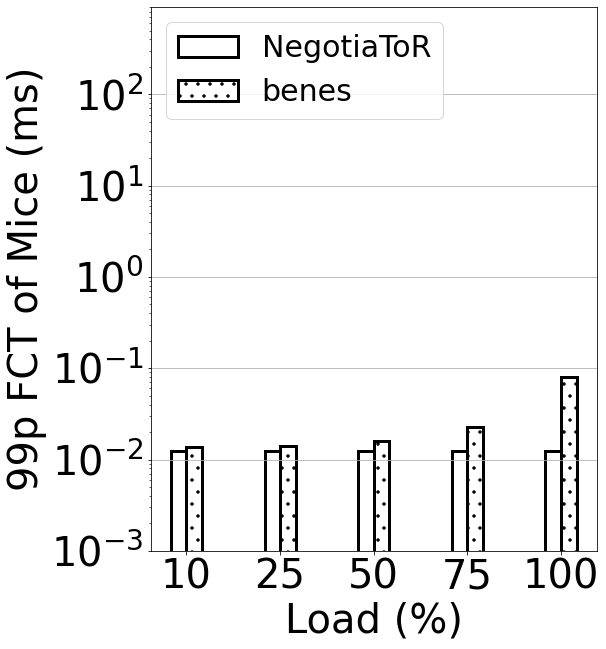

In [20]:
# FCT Slowdown横向比较
# PIAS = ['PIAS', 'NO-PIAS']
# PIAS = ['PIAS']

SCHEMES = ['NegotiaToR', 'benes']

PIAS = ['NO-PIAS']
gossip = 300
scheduled = 20
threshold = 25

my_figsize = [8, 10]
my_fontsize = 40
WIDTH = 0.05  # the width of the bars


def slowdown_bar_plot(mode, labels, workload, flow_range='all'):

    results = {}
    for scheme in SCHEMES1:
        results[scheme] = {}
        for pias in PIAS:
            results[scheme][pias] = []
            for load in LOADS:

                if flow_range == 'Mice':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['SHORT_IDX']
                elif flow_range == 'Elephant':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['LONG_IDX']
                elif flow_range == 'middle':
                    idx = data[scheme][pias][workload][load][gossip][scheduled]['MIDDLE_IDX']
                elif flow_range == 'all':
                    idx = np.arange(len(data[scheme][pias][workload][load][gossip][scheduled]['FCT']))

                available_idx = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][:, 7] > 0 # 过滤未完成的流
                idx = idx * available_idx

                fct = data[scheme][pias][workload][load][gossip][scheduled]['FCT'][idx, 7] # fct
                print(fct)

                if mode == 'Mean':
                    results[scheme][pias].append(np.mean(fct) * 1e3)
                elif mode == 'Median':
                    results[scheme][pias].append(np.percentile(fct, 50) * 1e3)
                elif mode == '99p':
                    results[scheme][pias].append(np.percentile(fct, 99) * 1e3)

    

    print(results)


    SCHEMES_label = ['NegotiaToR', 'benes']

    for pias in PIAS:
        x_tick = np.arange(len(labels))*0.3 # the label locations
        x = x_tick - (len(SCHEMES)-1)*WIDTH/2

        # fig, ax = plt.subplots(figsize=my_figsize)
        fig, ax = plt.subplots(figsize=my_figsize)
        ax.grid(axis='y')
        hatches = ["", ".", "\\", "/"]
        colors = ["white", "white", "white", "white"]
        for i, scheme in enumerate(SCHEMES):
            # ax.bar(x + WIDTH*i, results[scheme][mode], WIDTH, label=scheme)
            # 一次画一个scheme的所有load的bar
            ax.bar(x + WIDTH*i, results[scheme][pias], WIDTH, edgecolor="black", label=SCHEMES_label[i], linewidth = 3, color=[colors[i]], hatch=hatches[i])


        

        if mode == "Mean":
            ax.set_ylabel('Avg. FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        else:
            ax.set_ylabel(mode + ' FCT of ' + flow_range + " (ms)", fontsize=my_fontsize)
        ax.set_xlabel("Load (%)", fontsize=my_fontsize)
        ax.set_xticks(x_tick)

        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)

        ax.set_xticklabels(labels, fontsize=my_fontsize)
        ax.set_ylim([0.001,900])
        ax.legend(ncol=1, loc = "upper left", fontsize=30)
        ax.set_yscale('log')
        # ax.legend(ncol=2, loc = "upper left", fontsize=my_fontsize-2, handlelength=1.5, borderpad = 0.2, labelspacing = 0.3, columnspacing = 1.0)

        figure_path = '../FIGS/comparison_fct_mice.pdf'
        plt.savefig(figure_path, dpi=300, bbox_inches='tight')


slowdown_bar_plot("99p", labels, "W4", flow_range='Mice')